<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Feature_Importance_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
#df = df[df['n/m']!=2]

print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

8750


In [2]:
X_modified = X.drop(['indeks','range', 'subtype'], axis=1)
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
#print(shuffled.head())
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

   class    n   m    n/m   (n/m)^2      (n/m)^3       m/n   (m/n)^2   (m/n)^3  \
0      6   66  24   2.75    7.5625    20.796875  0.363636  0.132231  0.048084   
1      3   72  24   3.00    9.0000    27.000000  0.333333  0.111111  0.037037   
2      5   72  24   3.00    9.0000    27.000000  0.333333  0.111111  0.037037   
3      5   40  20   2.00    4.0000     8.000000  0.500000  0.250000  0.125000   
4      6  180  18  10.00  100.0000  1000.000000  0.100000  0.010000  0.001000   

    av.length     std.dev  median  min  max    k  
0  158.560608   61.066196   163.0   71  263   53  
1   73.166664   15.201000    73.0   50  100   39  
2   97.944443   49.034019    99.0    1  237   67  
3  114.199997   51.817333   110.0   12  239   36  
4  443.727783  153.247818   427.0  192  718  154  


In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0.0915473  1.         0.68749017 0.13151834 0.05824819 0.09786309
 0.03124136 0.06001013 0.06602896 0.0320629  0.14126686 0.
 0.0470169  0.18551482 0.0416938 ]


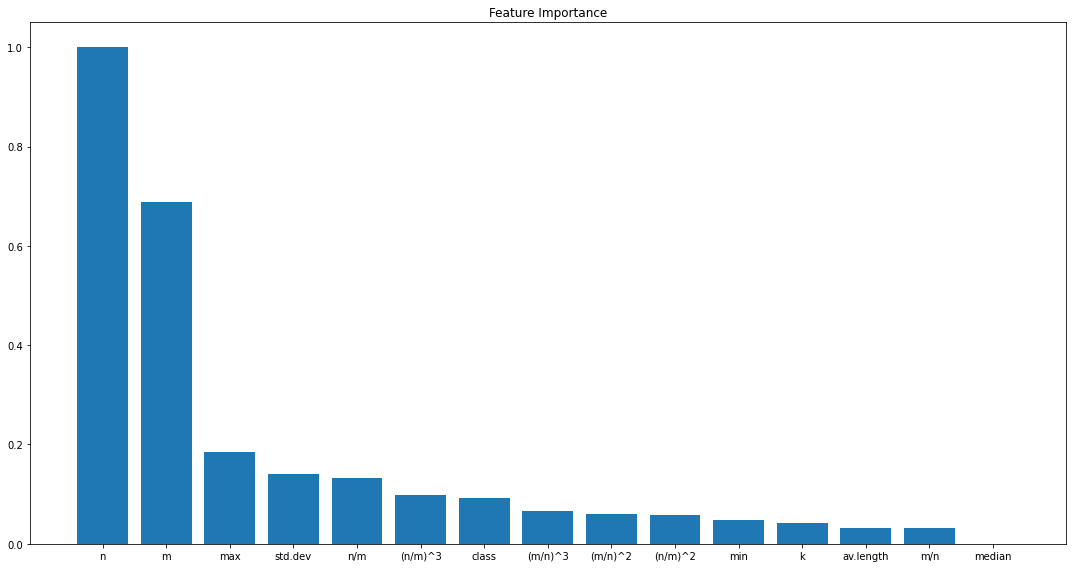

In [4]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

X_copy = X_modified
X_modified = sc.fit_transform(X_modified)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_modified, y_new)

importances = model.coef_[0]
importances = abs(importances)

importances = (importances-np.min(importances))/np.ptp(importances)

sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_copy.columns[1:]

print(importances)

plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(range(X_copy.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_copy.shape[1]), X_copy.columns[sorted_indices])
plt.tight_layout()
plt.show()
